In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

# 5Ïõî 27Ïùº ÌîÑÎ°úÏïºÍµ¨ ÌïúÌôî Ïù¥Í∏ÄÏä§ vs LGÌä∏ÏúàÏä§ ÏäπÎ∂ÄÏòàÏ∏°

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [333]:
lg_df1 = pd.read_csv('LG ÌÉÄÏûê Ï¢ÖÌï© data.csv', encoding="cp949")
hh_df1 = pd.read_csv('ÌïúÌôî ÌÉÄÏûê Ï¢ÖÌï© data.csv', encoding="cp949")

lg_df2 = pd.read_csv('LG ÌÉÄÏûê ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")
hh_df2 = pd.read_csv('ÌïúÌôî ÌÉÄÏûê ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")

lg_df3 = pd.read_csv('LG ÌÉÄÏûê Ï£ºÏûê ÏúÑÏπòÎ≥Ñ data.csv', encoding="cp949")
hh_df3 = pd.read_csv('ÌïúÌôî ÌÉÄÏûê Ï£ºÏûê ÏúÑÏπòÎ≥Ñ data.csv', encoding="cp949")

lg_df4 = pd.read_csv('LG ÌÉÄÏûê Ïπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")
hh_df4 = pd.read_csv('ÌïúÌôî ÌÉÄÏûê Ïπ¥Ïö¥Ìä∏Î≥Ñ data.csv', encoding="cp949")

lg_df5 = pd.read_csv('LG Ìà¨Ïàò ÏÉÅÎåÄÏ†ÑÏ†Å data.csv', encoding='utf-8')
hh_df5 = pd.read_csv('ÌïúÌôî Ìà¨Ïàò ÏÉÅÎåÄÏ†ÑÏ†Å data.csv', encoding="utf-8")

In [335]:
lg_df1

ÌÉÄÏûê Ï†ïÎ≥¥     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
0    ÌôçÏ∞ΩÍ∏∞  0.254  30    3    0   0  11  19     2      3  20  32  0.280  0.381   
1    Î∞ïÌï¥ÎØº  0.243  26    4    0   0   5  16     5      1  17  35  0.280  0.349   
2    Ïò§Ïä§Ìã¥  0.309  38    7    0  10  30  29     0      2  20  17  0.610  0.400   
3    Î¨∏Î≥¥Í≤Ω  0.308  41    6    0   7  32  26     0      2  22  30  0.511  0.409   
4    ÍπÄÌòÑÏàò  0.290  31    5    0   1  18  16     0      0  21  15  0.364  0.415   
5    Î∞ïÎèôÏõê  0.319  36    5    0   9  26  23     1      1  17  26  0.602  0.414   
6    Ïò§ÏßÄÌôò  0.236  25    7    0   3  16  14     4      3   8  31  0.387  0.288   
7    Î¨∏ÏÑ±Ï£º  0.235  20    2    0   0   8  11     0      1  10  12  0.259  0.313   
8    Ïã†ÎØºÏû¨  0.202  18    1    0   0  12  14     1      0  19  11  0.213  0.349   
9    ÏÜ°Ï∞¨Ïùò  0.232  19    7    0   2   9   5     1      1   5  27  0.390  0.289   
10   Íµ¨Î≥∏ÌòÅ  0.236  17    4    1   0   7   7     3      0   7  12  0.319  0.313   

      OPS  
0   0.661  
1   0.629  
2   1.010  
3   0.920  
4   0.770  
5   1.016  
6   0.675  
7   0.572  
8   0.562  
9   0.679  
10  0.632

In [337]:
hh_df1

ÌÉÄÏûê Ï†ïÎ≥¥     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
0    ÏµúÏù∏Ìò∏  0.256  10    2    0   0   3   2     1      0   5   9  0.308  0.356   
1   ÌîåÎ°úÎ¶¨Ïñº  0.253  37   12    1   2  20  16     0      1  14  43  0.390  0.317   
2    Î¨∏ÌòÑÎπà  0.305  36    7    0   6  20  15     0      0   8  21  0.517  0.359   
3    ÎÖ∏ÏãúÌôò  0.275  38    6    1  10  25  27     0      0  14  37  0.551  0.355   
4    Ï±ÑÏùÄÏÑ±  0.265  35   12    0   2  12  14     1      0   9  35  0.402  0.326   
5    Ïù¥ÏßÑÏòÅ  0.333  24    7    0   3  12  16     0      2  11  22  0.548  0.414   
6    ÏµúÏû¨Ìõà  0.315  17    1    0   0  10   5     2      4  12   7  0.333  0.461   
7    Ïã¨Ïö∞Ï§Ä  0.165  15    3    1   1   9   9     3      0   3  21  0.253  0.191   
8    Ìô©ÏòÅÎ¨µ  0.209  19    6    0   1   6  16     1      0  13  12  0.308  0.308   
9    ÍπÄÌÉúÏó∞  0.243  25    2    0   1   8  14     2      0   6  24  0.291  0.297   
10   Ïù¥Ïû¨Ïõê  0.200   9    0    1   0   5   0     1      2   3   9  0.244  0.240   

      OPS  
0   0.664  
1   0.707  
2   0.876  
3   0.906  
4   0.728  
5   0.962  
6   0.784  
7   0.444  
8   0.616  
9   0.588  
10  0.484

In [339]:
lg_df2

ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®  0 OUT  1 OUT  2 OUT
0           ÌôçÏ∞ΩÍ∏∞  0.327  0.185  0.194
1           Î∞ïÌï¥ÎØº  0.350  0.067  0.270
2           Ïò§Ïä§Ìã¥  0.333  0.304  0.293
3           Î¨∏Î≥¥Í≤Ω  0.354  0.257  0.300
4           ÍπÄÌòÑÏàò  0.250  0.282  0.333
5           Î∞ïÎèôÏõê  0.379  0.295  0.300
6           Ïò§ÏßÄÌôò  0.135  0.273  0.306
7           Î¨∏ÏÑ±Ï£º  0.171  0.324  0.188
8           Ïã†ÎØºÏû¨  0.194  0.250  0.176
9           ÏÜ°Ï∞¨Ïùò  0.172  0.296  0.231
10          Íµ¨Î≥∏ÌòÅ  0.278  0.194  0.261

In [341]:
hh_df2

ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®  0 OUT  1 OUT  2 OUT
0           ÏµúÏù∏Ìò∏  0.100  0.385  0.250
1          ÌîåÎ°úÎ¶¨Ïñº  0.184  0.306  0.239
2           Î¨∏ÌòÑÎπà  0.250  0.348  0.300
3           ÎÖ∏ÏãúÌôò  0.279  0.378  0.180
4           Ï±ÑÏùÄÏÑ±  0.239  0.267  0.293
5           Ïù¥ÏßÑÏòÅ  0.323  0.333  0.333
6           ÏµúÏû¨Ìõà  0.263  0.412  0.278
7           Ïã¨Ïö∞Ï§Ä  0.138  0.265  0.219
8           Ìô©ÏòÅÎ¨µ  0.214  0.310  0.050
9           ÍπÄÌÉúÏó∞  0.229  0.303  0.200
10          Ïù¥Ïû¨Ïõê  0.286  0.133  0.217

## df3 NaNÍ∞í Ï±ÑÏõåÏ£ºÍ∏∞

In [343]:
lg_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®   3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®     ÎßåÎ£®
0           ÌôçÏ∞ΩÍ∏∞  0.263  0.000  0.0  0.100  0.667  0.333  0.500
1           Î∞ïÌï¥ÎØº  0.118  0.000  0.0  0.000  0.000  0.000  0.286
2           Ïò§Ïä§Ìã¥  0.292  0.333  1.0  0.222  0.429    NaN  1.000
3           Î¨∏Î≥¥Í≤Ω  0.407  0.143  NaN  0.389  0.000  0.000  0.667
4           ÍπÄÌòÑÏàò  0.200  0.571  0.2  0.333  0.667  0.750  1.000
5           Î∞ïÎèôÏõê  0.310  0.444  0.5  0.333  0.200  0.000  0.000
6           Ïò§ÏßÄÌôò  0.118  0.000  0.4  0.429  0.000  0.333  0.500
7           Î¨∏ÏÑ±Ï£º  0.267  0.167  0.0  0.600  0.250  0.500  0.000
8           Ïã†ÎØºÏû¨  0.071  0.500  0.0  0.600  0.333  0.000  0.750
9           ÏÜ°Ï∞¨Ïùò  0.167  0.167  0.0  0.250  0.000    NaN  0.250
10          Íµ¨Î≥∏ÌòÅ  0.200  0.250  0.0  0.333  0.333    NaN  0.500

In [345]:
cols_to_fill = ["1Î£®", "2Î£®", "3Î£®", "1Î£®,2Î£®", "1Î£®,3Î£®", "2Î£®,3Î£®", "ÎßåÎ£®"]
lg_df3[cols_to_fill] = lg_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
lg_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®        3Î£®  1Î£®,2Î£®  1Î£®,3Î£®     2Î£®,3Î£®     ÎßåÎ£®
0           ÌôçÏ∞ΩÍ∏∞  0.263  0.000  0.000000  0.100  0.667  0.333000  0.500
1           Î∞ïÌï¥ÎØº  0.118  0.000  0.000000  0.000  0.000  0.000000  0.286
2           Ïò§Ïä§Ìã¥  0.292  0.333  1.000000  0.222  0.429  0.546000  1.000
3           Î¨∏Î≥¥Í≤Ω  0.407  0.143  0.267667  0.389  0.000  0.000000  0.667
4           ÍπÄÌòÑÏàò  0.200  0.571  0.200000  0.333  0.667  0.750000  1.000
5           Î∞ïÎèôÏõê  0.310  0.444  0.500000  0.333  0.200  0.000000  0.000
6           Ïò§ÏßÄÌôò  0.118  0.000  0.400000  0.429  0.000  0.333000  0.500
7           Î¨∏ÏÑ±Ï£º  0.267  0.167  0.000000  0.600  0.250  0.500000  0.000
8           Ïã†ÎØºÏû¨  0.071  0.500  0.000000  0.600  0.333  0.000000  0.750
9           ÏÜ°Ï∞¨Ïùò  0.167  0.167  0.000000  0.250  0.000  0.139000  0.250
10          Íµ¨Î≥∏ÌòÅ  0.200  0.250  0.000000  0.333  0.333  0.269333  0.500

In [347]:
hh_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®     3Î£®  1Î£®,2Î£®  1Î£®,3Î£®  2Î£®,3Î£®    ÎßåÎ£®
0           ÏµúÏù∏Ìò∏  0.571  0.167    NaN  0.400  1.000   0.00  0.00
1          ÌîåÎ°úÎ¶¨Ïñº  0.353  0.286  0.333  0.333  0.200   0.25  0.20
2           Î¨∏ÌòÑÎπà  0.421  0.167  0.500  0.200  0.250   0.00  0.75
3           ÎÖ∏ÏãúÌôò  0.133  0.308  0.333  0.500  0.000   0.25  0.00
4           Ï±ÑÏùÄÏÑ±  0.192  0.125  0.333  0.222  0.500   0.00  0.50
5           Ïù¥ÏßÑÏòÅ  0.467  0.286  0.000  0.000  1.000   0.25  1.00
6           ÏµúÏû¨Ìõà  0.333  0.250  0.667  0.333  0.000   0.00  0.50
7           Ïã¨Ïö∞Ï§Ä  0.105  0.111  0.333  0.333  0.000    NaN  1.00
8           Ìô©ÏòÅÎ¨µ  0.462  0.222  0.000  0.000  0.333   0.00   NaN
9           ÍπÄÌÉúÏó∞  0.385  0.222  0.000  0.333    NaN   0.50  0.00
10          Ïù¥Ïû¨Ïõê  0.167  0.333  0.000  0.000    NaN   1.00   NaN

In [351]:
cols_to_fill = ["1Î£®", "2Î£®", "3Î£®", "1Î£®,2Î£®", "1Î£®,3Î£®", "2Î£®,3Î£®", "ÎßåÎ£®"]
hh_df3[cols_to_fill] = hh_df3[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
hh_df3

Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®     1Î£®     2Î£®        3Î£®  1Î£®,2Î£®  1Î£®,3Î£®     2Î£®,3Î£®      ÎßåÎ£®
0           ÏµúÏù∏Ìò∏  0.571  0.167  0.356333  0.400  1.000  0.000000  0.0000
1          ÌîåÎ°úÎ¶¨Ïñº  0.353  0.286  0.333000  0.333  0.200  0.250000  0.2000
2           Î¨∏ÌòÑÎπà  0.421  0.167  0.500000  0.200  0.250  0.000000  0.7500
3           ÎÖ∏ÏãúÌôò  0.133  0.308  0.333000  0.500  0.000  0.250000  0.0000
4           Ï±ÑÏùÄÏÑ±  0.192  0.125  0.333000  0.222  0.500  0.000000  0.5000
5           Ïù¥ÏßÑÏòÅ  0.467  0.286  0.000000  0.000  1.000  0.250000  1.0000
6           ÏµúÏû¨Ìõà  0.333  0.250  0.667000  0.333  0.000  0.000000  0.5000
7           Ïã¨Ïö∞Ï§Ä  0.105  0.111  0.333000  0.333  0.000  0.313667  1.0000
8           Ìô©ÏòÅÎ¨µ  0.462  0.222  0.000000  0.000  0.333  0.000000  0.1695
9           ÍπÄÌÉúÏó∞  0.385  0.222  0.000000  0.333  0.240  0.500000  0.0000
10          Ïù¥Ïû¨Ïõê  0.167  0.333  0.000000  0.000  0.300  1.000000  0.3000

## df4 NaNÍ∞í Ï±ÑÏõåÏ£ºÍ∏∞

In [353]:
lg_df4

Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S  1S 1B  1S 2B  1S 3B  2S 1B  2S 2B  \
0            ÌôçÏ∞ΩÍ∏∞  0.250  0.313  0.176  0.333  0.400  0.333  0.263  0.043   
1            Î∞ïÌï¥ÎØº  0.444  0.417  0.118  0.000  0.250  0.000  0.158  0.217   
2            Ïò§Ïä§Ìã¥  0.455  0.400  0.250  0.250  0.286  0.000  0.167  0.143   
3            Î¨∏Î≥¥Í≤Ω  0.409  0.375  0.250  0.250  0.333  0.200  0.200  0.167   
4            ÍπÄÌòÑÏàò  0.300  0.400  0.091  0.600  0.125  0.333  0.176  0.222   
5            Î∞ïÎèôÏõê  0.571  0.167  0.250  0.333  0.545  0.000  0.167  0.056   
6            Ïò§ÏßÄÌôò  0.364  0.100  0.222  0.333  0.667    NaN  0.172  0.167   
7            Î¨∏ÏÑ±Ï£º  0.200  0.400  0.000  0.273  0.250  0.333  0.200  0.176   
8            Ïã†ÎØºÏû¨  0.059  0.667  0.154  0.000  0.000  0.500  0.000  0.214   
9            ÏÜ°Ï∞¨Ïùò  0.750  0.167  0.000  0.222  0.667  0.000  0.182  0.286   
10           Íµ¨Î≥∏ÌòÅ  0.200  0.000  0.143  0.500  0.200  1.000  0.250  0.286   

    2S 3B     1B     2B   3B  
0   0.375  0.667  0.667  NaN  
1   0.333  0.000  0.000  NaN  
2   0.375  0.438  0.438  NaN  
3   0.467  0.571  0.500  NaN  
4   0.200  0.462  0.500  NaN  
5   0.182  0.800  0.500  0.0  
6   0.083  0.750  0.000  NaN  
7   0.083  0.400  1.000  NaN  
8   0.545  0.400  0.200  NaN  
9   0.182  0.400  0.250  NaN  
10  0.000  0.200  0.000  NaN

In [355]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

lg_df4[count_cols] = lg_df4[count_cols].fillna(lg_df4[count_cols].mean())
lg_df4

Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S  1S 1B  1S 2B   1S 3B  2S 1B  2S 2B  \
0            ÌôçÏ∞ΩÍ∏∞  0.250  0.313  0.176  0.333  0.400  0.3330  0.263  0.043   
1            Î∞ïÌï¥ÎØº  0.444  0.417  0.118  0.000  0.250  0.0000  0.158  0.217   
2            Ïò§Ïä§Ìã¥  0.455  0.400  0.250  0.250  0.286  0.0000  0.167  0.143   
3            Î¨∏Î≥¥Í≤Ω  0.409  0.375  0.250  0.250  0.333  0.2000  0.200  0.167   
4            ÍπÄÌòÑÏàò  0.300  0.400  0.091  0.600  0.125  0.3330  0.176  0.222   
5            Î∞ïÎèôÏõê  0.571  0.167  0.250  0.333  0.545  0.0000  0.167  0.056   
6            Ïò§ÏßÄÌôò  0.364  0.100  0.222  0.333  0.667  0.2699  0.172  0.167   
7            Î¨∏ÏÑ±Ï£º  0.200  0.400  0.000  0.273  0.250  0.3330  0.200  0.176   
8            Ïã†ÎØºÏû¨  0.059  0.667  0.154  0.000  0.000  0.5000  0.000  0.214   
9            ÏÜ°Ï∞¨Ïùò  0.750  0.167  0.000  0.222  0.667  0.0000  0.182  0.286   
10           Íµ¨Î≥∏ÌòÅ  0.200  0.000  0.143  0.500  0.200  1.0000  0.250  0.286   

    2S 3B     1B     2B   3B  
0   0.375  0.667  0.667  0.0  
1   0.333  0.000  0.000  0.0  
2   0.375  0.438  0.438  0.0  
3   0.467  0.571  0.500  0.0  
4   0.200  0.462  0.500  0.0  
5   0.182  0.800  0.500  0.0  
6   0.083  0.750  0.000  0.0  
7   0.083  0.400  1.000  0.0  
8   0.545  0.400  0.200  0.0  
9   0.182  0.400  0.250  0.0  
10  0.000  0.200  0.000  0.0

In [357]:
hh_df4

Ïπ¥Ïö¥Ìä∏Î≥Ñ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S  1S 1B  1S 2B  1S 3B  2S 1B  2S 2B  2S 3B  \
0         ÏµúÏù∏Ìò∏  0.750  0.250  0.000  0.000  0.667  1.000  0.125  0.143  0.000   
1        ÌîåÎ°úÎ¶¨Ïñº  0.474  0.667  0.059  0.111  0.455  0.750  0.032  0.174  0.231   
2         Î¨∏ÌòÑÎπà  0.500  0.167  0.133  0.308  0.200  0.667  0.286  0.333  0.273   
3         ÎÖ∏ÏãúÌôò  0.417  0.429  0.000  0.417  0.364  0.000  0.286  0.214  0.000   
4         Ï±ÑÏùÄÏÑ±  0.222  0.421  0.188  0.467  0.667    NaN  0.158  0.167  0.000   
5         Ïù¥ÏßÑÏòÅ  0.286  0.455  0.222  0.800  0.500  0.000  0.091  0.417  0.000   
6         ÏµúÏû¨Ìõà  0.000  0.571  0.125  0.333  0.333  0.000  0.333  0.154  0.800   
7         Ïã¨Ïö∞Ï§Ä  0.167  0.077  0.250  0.167  0.167    NaN  0.105  0.176  0.100   
8         Ìô©ÏòÅÎ¨µ  0.313  0.364  0.125  0.091  0.250  0.500  0.000  0.294  0.000   
9         ÍπÄÌÉúÏó∞  0.300  0.100  0.250  0.500  0.333  0.500  0.150  0.238  0.200   
10        Ïù¥Ïû¨Ïõê  0.286  0.400  0.200  0.250  0.000    NaN  0.000  0.125  0.000   

       1B     2B   3B  
0   0.333    NaN  NaN  
1   0.600  0.200  NaN  
2   0.250  0.250  NaN  
3   0.385  0.333  1.0  
4   0.167  0.400  NaN  
5   0.250  1.000  NaN  
6     NaN  0.333  NaN  
7   0.333  0.667  NaN  
8   0.167  0.000  NaN  
9   0.250  0.333  NaN  
10  0.333  1.000  NaN

In [359]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

hh_df4[count_cols] = hh_df4[count_cols].fillna(hh_df4[count_cols].mean())
hh_df4['3B'] = 0.0 #ÌèâÍ∑†ÏúºÎ°ú ÏïàÌï®
hh_df4

Ïπ¥Ïö¥Ìä∏Î≥Ñ ÌÉÄÏûê ÌÉÄÏú®  0S 0B    1S      2S  1S 1B  1S 2B     1S 3B  2S 1B  2S 2B  \
0         ÏµúÏù∏Ìò∏  0.750  0.250  0.000  0.000  0.667  1.000000  0.125  0.143   
1        ÌîåÎ°úÎ¶¨Ïñº  0.474  0.667  0.059  0.111  0.455  0.750000  0.032  0.174   
2         Î¨∏ÌòÑÎπà  0.500  0.167  0.133  0.308  0.200  0.667000  0.286  0.333   
3         ÎÖ∏ÏãúÌôò  0.417  0.429  0.000  0.417  0.364  0.000000  0.286  0.214   
4         Ï±ÑÏùÄÏÑ±  0.222  0.421  0.188  0.467  0.667  0.427125  0.158  0.167   
5         Ïù¥ÏßÑÏòÅ  0.286  0.455  0.222  0.800  0.500  0.000000  0.091  0.417   
6         ÏµúÏû¨Ìõà  0.000  0.571  0.125  0.333  0.333  0.000000  0.333  0.154   
7         Ïã¨Ïö∞Ï§Ä  0.167  0.077  0.250  0.167  0.167  0.427125  0.105  0.176   
8         Ìô©ÏòÅÎ¨µ  0.313  0.364  0.125  0.091  0.250  0.500000  0.000  0.294   
9         ÍπÄÌÉúÏó∞  0.300  0.100  0.250  0.500  0.333  0.500000  0.150  0.238   
10        Ïù¥Ïû¨Ïõê  0.286  0.400  0.200  0.250  0.000  0.427125  0.000  0.125   

    2S 3B      1B      2B   3B  
0   0.000  0.3330  0.4516  0.0  
1   0.231  0.6000  0.2000  0.0  
2   0.273  0.2500  0.2500  0.0  
3   0.000  0.3850  0.3330  0.0  
4   0.000  0.1670  0.4000  0.0  
5   0.000  0.2500  1.0000  0.0  
6   0.800  0.3068  0.3330  0.0  
7   0.100  0.3330  0.6670  0.0  
8   0.000  0.1670  0.0000  0.0  
9   0.200  0.2500  0.3330  0.0  
10  0.000  0.3330  1.0000  0.0

## ÏÉÅÎåÄÏ†ÑÏ†Å Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏÉùÏÑ±ÌïòÍ∏∞

In [361]:
lg_df5

ÏÉÅÎåÄÏ†ÑÏ†Å    Î•òÌòÑÏßÑ
0   ÌôçÏ∞ΩÍ∏∞  0.167
1   Î∞ïÌï¥ÎØº  0.000
2   Ïò§Ïä§Ìã¥  0.200
3   Î¨∏Î≥¥Í≤Ω  0.400
4   ÍπÄÌòÑÏàò  0.250
5   Î∞ïÎèôÏõê  0.600
6   Ïò§ÏßÄÌôò  0.000
7   Î¨∏ÏÑ±Ï£º  0.000
8   Ïã†ÎØºÏû¨    NaN
9   ÏÜ°Ï∞¨Ïùò  0.333
10  Íµ¨Î≥∏ÌòÅ  0.000

In [363]:
ÌÉÄÏûêÏª¨Îüº = ['Î•òÌòÑÏßÑ']
for col in ÌÉÄÏûêÏª¨Îüº:
    col_mean = lg_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean)
        else:
            return row[col]
    lg_df5[col] = lg_df5.apply(fill_func, axis=1)

lg_df5

ÏÉÅÎåÄÏ†ÑÏ†Å    Î•òÌòÑÏßÑ
0   ÌôçÏ∞ΩÍ∏∞  0.167
1   Î∞ïÌï¥ÎØº  0.000
2   Ïò§Ïä§Ìã¥  0.200
3   Î¨∏Î≥¥Í≤Ω  0.400
4   ÍπÄÌòÑÏàò  0.250
5   Î∞ïÎèôÏõê  0.600
6   Ïò§ÏßÄÌôò  0.000
7   Î¨∏ÏÑ±Ï£º  0.000
8   Ïã†ÎØºÏû¨  0.195
9   ÏÜ°Ï∞¨Ïùò  0.333
10  Íµ¨Î≥∏ÌòÅ  0.000

In [365]:
hh_df5

ÏÉÅÎåÄÏ†ÑÏ†Å    ÏûÑÏ∞¨Í∑ú
0    ÏµúÏù∏Ìò∏    NaN
1   ÌîåÎ°úÎ¶¨Ïñº  0.250
2    Î¨∏ÌòÑÎπà  0.000
3    ÎÖ∏ÏãúÌôò  0.333
4    Ï±ÑÏùÄÏÑ±  0.333
5    Ïù¥ÏßÑÏòÅ    NaN
6    ÏµúÏû¨Ìõà    NaN
7    Ïã¨Ïö∞Ï§Ä  0.000
8    Ìô©ÏòÅÎ¨µ  0.333
9    ÍπÄÌÉúÏó∞  0.000
10   Ïù¥Ïû¨Ïõê  0.000

In [369]:
ÌÉÄÏûêÏª¨Îüº = ['ÏûÑÏ∞¨Í∑ú']
for col in ÌÉÄÏûêÏª¨Îüº:
    col_mean = hh_df5[col].mean()
    def fill_func(row):
        if pd.isna(row[col]):
            return (col_mean)
        else:
            return row[col]
    hh_df5[col] = hh_df5.apply(fill_func, axis=1)

hh_df5

ÏÉÅÎåÄÏ†ÑÏ†Å       ÏûÑÏ∞¨Í∑ú
0    ÏµúÏù∏Ìò∏  0.156125
1   ÌîåÎ°úÎ¶¨Ïñº  0.250000
2    Î¨∏ÌòÑÎπà  0.000000
3    ÎÖ∏ÏãúÌôò  0.333000
4    Ï±ÑÏùÄÏÑ±  0.333000
5    Ïù¥ÏßÑÏòÅ  0.156125
6    ÏµúÏû¨Ìõà  0.156125
7    Ïã¨Ïö∞Ï§Ä  0.000000
8    Ìô©ÏòÅÎ¨µ  0.333000
9    ÍπÄÌÉúÏó∞  0.000000
10   Ïù¥Ïû¨Ïõê  0.000000

## ÌÉÄÏàú ÏßúÍ∏∞

In [371]:
lg_df1 = lg_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
lg_df5 = lg_df5.rename(columns={'ÏÉÅÎåÄÏ†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [373]:
df1 = pd.merge(lg_df1, lg_df5[['ÌÉÄÏûêÎ™Ö', 'Î•òÌòÑÏßÑ']], on='ÌÉÄÏûêÎ™Ö', how='left')
df1

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
0   ÌôçÏ∞ΩÍ∏∞  0.254  30    3    0   0  11  19     2      3  20  32  0.280  0.381   
1   Î∞ïÌï¥ÎØº  0.243  26    4    0   0   5  16     5      1  17  35  0.280  0.349   
2   Ïò§Ïä§Ìã¥  0.309  38    7    0  10  30  29     0      2  20  17  0.610  0.400   
3   Î¨∏Î≥¥Í≤Ω  0.308  41    6    0   7  32  26     0      2  22  30  0.511  0.409   
4   ÍπÄÌòÑÏàò  0.290  31    5    0   1  18  16     0      0  21  15  0.364  0.415   
5   Î∞ïÎèôÏõê  0.319  36    5    0   9  26  23     1      1  17  26  0.602  0.414   
6   Ïò§ÏßÄÌôò  0.236  25    7    0   3  16  14     4      3   8  31  0.387  0.288   
7   Î¨∏ÏÑ±Ï£º  0.235  20    2    0   0   8  11     0      1  10  12  0.259  0.313   
8   Ïã†ÎØºÏû¨  0.202  18    1    0   0  12  14     1      0  19  11  0.213  0.349   
9   ÏÜ°Ï∞¨Ïùò  0.232  19    7    0   2   9   5     1      1   5  27  0.390  0.289   
10  Íµ¨Î≥∏ÌòÅ  0.236  17    4    1   0   7   7     3      0   7  12  0.319  0.313   

      OPS    Î•òÌòÑÏßÑ  
0   0.661  0.167  
1   0.629  0.000  
2   1.010  0.200  
3   0.920  0.400  
4   0.770  0.250  
5   1.016  0.600  
6   0.675  0.000  
7   0.572  0.000  
8   0.562  0.195  
9   0.679  0.333  
10  0.632  0.000

## ÌÉÄÏú®, OPS, Ìà¨Ïàò ÏÉÅÎåÄÏ†ÑÏ†ÅÏùÑ Í∞ÅÍ∞Å 0.3 0.6 0.1 Í∞ÄÏ§ëÏπòÎ°ú ÎëêÏñ¥ÏÑú Ìï©ÏÇ∞

In [375]:
df1['Ï†êÏàò'] = (df1['ÌÉÄÏú®'] * 0.3) + (df1['OPS'] * 0.6) + (df1['Î•òÌòÑÏßÑ'] * 0.1)
df_lgÌÉÄÏàú = df1.sort_values(by='Ï†êÏàò', ascending=False)
df_lgÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
5   Î∞ïÎèôÏõê  0.319  36    5    0   9  26  23     1      1  17  26  0.602  0.414   
2   Ïò§Ïä§Ìã¥  0.309  38    7    0  10  30  29     0      2  20  17  0.610  0.400   
3   Î¨∏Î≥¥Í≤Ω  0.308  41    6    0   7  32  26     0      2  22  30  0.511  0.409   
4   ÍπÄÌòÑÏàò  0.290  31    5    0   1  18  16     0      0  21  15  0.364  0.415   
9   ÏÜ°Ï∞¨Ïùò  0.232  19    7    0   2   9   5     1      1   5  27  0.390  0.289   
0   ÌôçÏ∞ΩÍ∏∞  0.254  30    3    0   0  11  19     2      3  20  32  0.280  0.381   
6   Ïò§ÏßÄÌôò  0.236  25    7    0   3  16  14     4      3   8  31  0.387  0.288   
1   Î∞ïÌï¥ÎØº  0.243  26    4    0   0   5  16     5      1  17  35  0.280  0.349   
10  Íµ¨Î≥∏ÌòÅ  0.236  17    4    1   0   7   7     3      0   7  12  0.319  0.313   
8   Ïã†ÎØºÏû¨  0.202  18    1    0   0  12  14     1      0  19  11  0.213  0.349   
7   Î¨∏ÏÑ±Ï£º  0.235  20    2    0   0   8  11     0      1  10  12  0.259  0.313   

      OPS    Î•òÌòÑÏßÑ      Ï†êÏàò  
5   1.016  0.600  0.7653  
2   1.010  0.200  0.7187  
3   0.920  0.400  0.6844  
4   0.770  0.250  0.5740  
9   0.679  0.333  0.5103  
0   0.661  0.167  0.4895  
6   0.675  0.000  0.4758  
1   0.629  0.000  0.4503  
10  0.632  0.000  0.4500  
8   0.562  0.195  0.4173  
7   0.572  0.000  0.4137

In [377]:
hh_df1 = hh_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
hh_df5 = hh_df5.rename(columns={'ÏÉÅÎåÄÏ†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [379]:
df2 = pd.merge(hh_df1, hh_df5[['ÌÉÄÏûêÎ™Ö', 'ÏûÑÏ∞¨Í∑ú']], on='ÌÉÄÏûêÎ™Ö', how='left')
df2

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
0    ÏµúÏù∏Ìò∏  0.256  10    2    0   0   3   2     1      0   5   9  0.308  0.356   
1   ÌîåÎ°úÎ¶¨Ïñº  0.253  37   12    1   2  20  16     0      1  14  43  0.390  0.317   
2    Î¨∏ÌòÑÎπà  0.305  36    7    0   6  20  15     0      0   8  21  0.517  0.359   
3    ÎÖ∏ÏãúÌôò  0.275  38    6    1  10  25  27     0      0  14  37  0.551  0.355   
4    Ï±ÑÏùÄÏÑ±  0.265  35   12    0   2  12  14     1      0   9  35  0.402  0.326   
5    Ïù¥ÏßÑÏòÅ  0.333  24    7    0   3  12  16     0      2  11  22  0.548  0.414   
6    ÏµúÏû¨Ìõà  0.315  17    1    0   0  10   5     2      4  12   7  0.333  0.461   
7    Ïã¨Ïö∞Ï§Ä  0.165  15    3    1   1   9   9     3      0   3  21  0.253  0.191   
8    Ìô©ÏòÅÎ¨µ  0.209  19    6    0   1   6  16     1      0  13  12  0.308  0.308   
9    ÍπÄÌÉúÏó∞  0.243  25    2    0   1   8  14     2      0   6  24  0.291  0.297   
10   Ïù¥Ïû¨Ïõê  0.200   9    0    1   0   5   0     1      2   3   9  0.244  0.240   

      OPS       ÏûÑÏ∞¨Í∑ú  
0   0.664  0.156125  
1   0.707  0.250000  
2   0.876  0.000000  
3   0.906  0.333000  
4   0.728  0.333000  
5   0.962  0.156125  
6   0.784  0.156125  
7   0.444  0.000000  
8   0.616  0.333000  
9   0.588  0.000000  
10  0.484  0.000000

In [381]:
df2['Ï†êÏàò'] = (df2['ÌÉÄÏú®'] * 0.3) + (df2['OPS'] * 0.6) + (df2['ÏûÑÏ∞¨Í∑ú'] * 0.1)
df_ÌïúÌôîÌÉÄÏàú = df2.sort_values(by='Ï†êÏàò', ascending=False)
df_ÌïúÌôîÌÉÄÏàú

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  Î≥ºÎÑ∑  ÏÇºÏßÑ    Ïû•ÌÉÄÏú®    Ï∂úÎ£®Ïú®  \
5    Ïù¥ÏßÑÏòÅ  0.333  24    7    0   3  12  16     0      2  11  22  0.548  0.414   
3    ÎÖ∏ÏãúÌôò  0.275  38    6    1  10  25  27     0      0  14  37  0.551  0.355   
2    Î¨∏ÌòÑÎπà  0.305  36    7    0   6  20  15     0      0   8  21  0.517  0.359   
6    ÏµúÏû¨Ìõà  0.315  17    1    0   0  10   5     2      4  12   7  0.333  0.461   
4    Ï±ÑÏùÄÏÑ±  0.265  35   12    0   2  12  14     1      0   9  35  0.402  0.326   
1   ÌîåÎ°úÎ¶¨Ïñº  0.253  37   12    1   2  20  16     0      1  14  43  0.390  0.317   
0    ÏµúÏù∏Ìò∏  0.256  10    2    0   0   3   2     1      0   5   9  0.308  0.356   
8    Ìô©ÏòÅÎ¨µ  0.209  19    6    0   1   6  16     1      0  13  12  0.308  0.308   
9    ÍπÄÌÉúÏó∞  0.243  25    2    0   1   8  14     2      0   6  24  0.291  0.297   
10   Ïù¥Ïû¨Ïõê  0.200   9    0    1   0   5   0     1      2   3   9  0.244  0.240   
7    Ïã¨Ïö∞Ï§Ä  0.165  15    3    1   1   9   9     3      0   3  21  0.253  0.191   

      OPS       ÏûÑÏ∞¨Í∑ú        Ï†êÏàò  
5   0.962  0.156125  0.692712  
3   0.906  0.333000  0.659400  
2   0.876  0.000000  0.617100  
6   0.784  0.156125  0.580512  
4   0.728  0.333000  0.549600  
1   0.707  0.250000  0.525100  
0   0.664  0.156125  0.490812  
8   0.616  0.333000  0.465600  
9   0.588  0.000000  0.425700  
10  0.484  0.000000  0.350400  
7   0.444  0.000000  0.315900

## Í≤ΩÍ∏∞ ÏòàÏ∏°ÌïòÍ∏∞

In [383]:
lg_df1 = lg_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
lg_df2 = lg_df2.rename(columns={'ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
lg_df3 = lg_df3.rename(columns={'Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
lg_df4 = lg_df4.rename(columns={'Ïπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏûê ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
lg_df5 = lg_df5.rename(columns={'ÏÉÅÎåÄÏ†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [385]:
hh_df1 = hh_df1.rename(columns={'ÌÉÄÏûê Ï†ïÎ≥¥': 'ÌÉÄÏûêÎ™Ö'})
hh_df2 = hh_df2.rename(columns={'ÏïÑÏõÉÏπ¥Ïö¥Ìä∏Ïóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
hh_df3 = hh_df3.rename(columns={'Ï£ºÏûê ÏúÑÏπòÏóê Îî∞Î•∏ ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
hh_df4 = hh_df4.rename(columns={'Ïπ¥Ïö¥Ìä∏Î≥Ñ ÌÉÄÏûê ÌÉÄÏú®': 'ÌÉÄÏûêÎ™Ö'})
hh_df5 = hh_df5.rename(columns={'ÏÉÅÎåÄÏ†ÑÏ†Å': 'ÌÉÄÏûêÎ™Ö'})

In [387]:
merge_keys = ['ÌÉÄÏûêÎ™Ö']

lg_merged = lg_df1.merge(lg_df2, on=merge_keys, how='left') \
                           .merge(lg_df3, on=merge_keys, how='left') \
                           .merge(lg_df4, on=merge_keys, how='left')


In [389]:
lg_merged

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...     2S  1S 1B  \
0   ÌôçÏ∞ΩÍ∏∞  0.254  30    3    0   0  11  19     2      3  ...  0.176  0.333   
1   Î∞ïÌï¥ÎØº  0.243  26    4    0   0   5  16     5      1  ...  0.118  0.000   
2   Ïò§Ïä§Ìã¥  0.309  38    7    0  10  30  29     0      2  ...  0.250  0.250   
3   Î¨∏Î≥¥Í≤Ω  0.308  41    6    0   7  32  26     0      2  ...  0.250  0.250   
4   ÍπÄÌòÑÏàò  0.290  31    5    0   1  18  16     0      0  ...  0.091  0.600   
5   Î∞ïÎèôÏõê  0.319  36    5    0   9  26  23     1      1  ...  0.250  0.333   
6   Ïò§ÏßÄÌôò  0.236  25    7    0   3  16  14     4      3  ...  0.222  0.333   
7   Î¨∏ÏÑ±Ï£º  0.235  20    2    0   0   8  11     0      1  ...  0.000  0.273   
8   Ïã†ÎØºÏû¨  0.202  18    1    0   0  12  14     1      0  ...  0.154  0.000   
9   ÏÜ°Ï∞¨Ïùò  0.232  19    7    0   2   9   5     1      1  ...  0.000  0.222   
10  Íµ¨Î≥∏ÌòÅ  0.236  17    4    1   0   7   7     3      0  ...  0.143  0.500   

    1S 2B   1S 3B  2S 1B  2S 2B  2S 3B     1B     2B   3B  
0   0.400  0.3330  0.263  0.043  0.375  0.667  0.667  0.0  
1   0.250  0.0000  0.158  0.217  0.333  0.000  0.000  0.0  
2   0.286  0.0000  0.167  0.143  0.375  0.438  0.438  0.0  
3   0.333  0.2000  0.200  0.167  0.467  0.571  0.500  0.0  
4   0.125  0.3330  0.176  0.222  0.200  0.462  0.500  0.0  
5   0.545  0.0000  0.167  0.056  0.182  0.800  0.500  0.0  
6   0.667  0.2699  0.172  0.167  0.083  0.750  0.000  0.0  
7   0.250  0.3330  0.200  0.176  0.083  0.400  1.000  0.0  
8   0.000  0.5000  0.000  0.214  0.545  0.400  0.200  0.0  
9   0.667  0.0000  0.182  0.286  0.182  0.400  0.250  0.0  
10  0.200  1.0000  0.250  0.286  0.000  0.200  0.000  0.0  

[11 rows x 37 columns]

In [391]:
hh_merged = hh_df1.merge(hh_df2, on=merge_keys, how='left') \
                           .merge(hh_df3, on=merge_keys, how='left') \
                           .merge(hh_df4, on=merge_keys, how='left')

In [393]:
hh_merged

ÌÉÄÏûêÎ™Ö     ÌÉÄÏú®  ÏïàÌÉÄ  2Î£®ÌÉÄ  3Î£®ÌÉÄ  ÌôàÎü∞  ÌÉÄÏ†ê  ÎìùÏ†ê  Ìù¨ÏÉùÎ≤àÌä∏  Ìù¨ÏÉùÌîåÎùºÏù¥  ...     2S  1S 1B  \
0    ÏµúÏù∏Ìò∏  0.256  10    2    0   0   3   2     1      0  ...  0.000  0.000   
1   ÌîåÎ°úÎ¶¨Ïñº  0.253  37   12    1   2  20  16     0      1  ...  0.059  0.111   
2    Î¨∏ÌòÑÎπà  0.305  36    7    0   6  20  15     0      0  ...  0.133  0.308   
3    ÎÖ∏ÏãúÌôò  0.275  38    6    1  10  25  27     0      0  ...  0.000  0.417   
4    Ï±ÑÏùÄÏÑ±  0.265  35   12    0   2  12  14     1      0  ...  0.188  0.467   
5    Ïù¥ÏßÑÏòÅ  0.333  24    7    0   3  12  16     0      2  ...  0.222  0.800   
6    ÏµúÏû¨Ìõà  0.315  17    1    0   0  10   5     2      4  ...  0.125  0.333   
7    Ïã¨Ïö∞Ï§Ä  0.165  15    3    1   1   9   9     3      0  ...  0.250  0.167   
8    Ìô©ÏòÅÎ¨µ  0.209  19    6    0   1   6  16     1      0  ...  0.125  0.091   
9    ÍπÄÌÉúÏó∞  0.243  25    2    0   1   8  14     2      0  ...  0.250  0.500   
10   Ïù¥Ïû¨Ïõê  0.200   9    0    1   0   5   0     1      2  ...  0.200  0.250   

    1S 2B     1S 3B  2S 1B  2S 2B  2S 3B      1B      2B   3B  
0   0.667  1.000000  0.125  0.143  0.000  0.3330  0.4516  0.0  
1   0.455  0.750000  0.032  0.174  0.231  0.6000  0.2000  0.0  
2   0.200  0.667000  0.286  0.333  0.273  0.2500  0.2500  0.0  
3   0.364  0.000000  0.286  0.214  0.000  0.3850  0.3330  0.0  
4   0.667  0.427125  0.158  0.167  0.000  0.1670  0.4000  0.0  
5   0.500  0.000000  0.091  0.417  0.000  0.2500  1.0000  0.0  
6   0.333  0.000000  0.333  0.154  0.800  0.3068  0.3330  0.0  
7   0.167  0.427125  0.105  0.176  0.100  0.3330  0.6670  0.0  
8   0.250  0.500000  0.000  0.294  0.000  0.1670  0.0000  0.0  
9   0.333  0.500000  0.150  0.238  0.200  0.2500  0.3330  0.0  
10  0.000  0.427125  0.000  0.125  0.000  0.3330  1.0000  0.0  

[11 rows x 37 columns]

In [397]:
def compute_player_hit_probs(df):

    # ÌÉÄÏú®Í≥º OPSÏùò ÏµúÏÜå, ÏµúÎåÄ Í∞í Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    avg_min, avg_max = df['ÌÉÄÏú®'].min(), df['ÌÉÄÏú®'].max()
    ops_min, ops_max = df['OPS'].min(), df['OPS'].max()

    player_probs = {}

    for idx, row in df.iterrows():
        pa = estimate_at_bats(row)
        total_hits = row['ÏïàÌÉÄ']

        if pa == 0 or total_hits == 0 or pd.isna(row['ÌÉÄÏú®']) or pd.isna(row['OPS']):
            probs = {'1B': 0, '2B': 0, '3B': 0, 'HR': 0, 'OUT': 1.0}
            
        else:
            avg_range = max(0.001, avg_max - avg_min)
            ops_range = max(0.001, ops_max - ops_min)

            avg_norm = (row['ÌÉÄÏú®'] - avg_min) / avg_range
            ops_norm = (row['OPS'] - ops_min) / ops_range
            # ÏÑ†ÏàòÎ≥Ñ ÏïàÌÉÄÏπ† ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§. (0.1~0.35 ÏÇ¨Ïù¥Î°ú ÏÑ§Ï†ï)
            # Ïù¥ Í∞íÎì§ÏùÑ ÏûêÏú†Î°≠Í≤å Î≥ÄÍ≤ΩÌïòÏÖîÏÑú Ïã§Ï†ú Í≤∞Í≥ºÏôÄ ÎπÑÏä∑Ìïú parameterÍ∞Ä Î¨¥ÏóáÏùºÏßÄ Ï∞æÏïÑÎ≥¥Î©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏäµÎãàÎã§!
            
            #1. ÏÉÅÌô©Î≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï¥ÏÑú Îã§ÏñëÌïú ÏÉÅÌô© ÏÜçÏóêÏÑú ÌÉÄÏûêÍ∞Ä ÏïàÌÉÄ Ïπ† ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
            out_weights = ['0ÏïÑÏõÉ', '1ÏïÑÏõÉ', '2ÏïÑÏõÉ']
            
            #(ÎìùÏ†êÍ∂å ÏÉÅÌô©)
            runner_weights = ['ÎßåÎ£®', '2Î£®,3Î£®', '1Î£®,3Î£®', '1Î£®,2Î£®']
            
            #(ÌòÑÎåÄ ÏïºÍµ¨ÏóêÏÑú Í∞ÄÏû• ÎßéÏùÄ ÌÉÄÍ≤©Ïù¥ ÏùºÏñ¥ÎÇòÎäî Ïπ¥Ïö¥Ìä∏)
            count_weights = ['2S 3B', '2S 2B', '2S 1B', '1S 1B', '1S 2B', '1S 3B']

            out_weight = np.mean([row.get(ow, 0.25) for ow in out_weights])
            runner_weight = np.mean([row.get(rw, 0.25) for rw in runner_weights])
            count_weight = np.mean([row.get(cw, 0.25) for cw in count_weights])
            
            
            # Í∏∞Î≥∏Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìïú ÌôïÎ•† (ÌÉÄÏú®Í≥º OPSÎ•º Í∞ÅÍ∞Å 0.5, 0.5 Í∞ÄÏ§ëÏπòÎ•º ÎëêÏóàÏäµÎãàÎã§.)
            base_hit_prob = 0.1 + 0.2 * (0.5 * avg_norm + 0.5 * ops_norm)
            
            # ÏÉÅÌô©Î≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìïú ÌôïÎ•† (Í∞ÅÍ∞Å 0.3, 0.4, 0.3 Í∞ÄÏ§ëÏπòÎ•º ÎëêÏóàÏäµÎãàÎã§.)
            situational_factor = 0.05 * (0.3 * out_weight + 0.4 * runner_weight + 0.3 * count_weight) / 3  
            prob_hit = min(0.35, base_hit_prob + situational_factor)
            prob_out = 1 - prob_hit

            # Í∞Å ÏÑ†ÏàòÎ≥Ñ ÏïàÌÉÄ, 2Î£®ÌÉÄ, 3Î£®ÌÉÄ, ÌôàÎü∞Ïπ† ÌôïÎ•† ÏÉùÏÑ±Ìï©ÎãàÎã§.
            prob_1B = max(0.01, row['1B'] / total_hits)
            prob_2B = max(0.007, row['2B'] / total_hits)
            prob_3B = max(0.005, row['3B'] / total_hits)
            prob_HR = max(0.003, row['ÌôàÎü∞'] / total_hits)

            total_ratio = prob_1B + prob_2B + prob_3B + prob_HR
            prob_1B /= total_ratio
            prob_2B /= total_ratio
            prob_3B /= total_ratio
            prob_HR /= total_ratio
            
            probs = {
                '1B': prob_hit * prob_1B,
                '2B': prob_hit * prob_2B,
                '3B': prob_hit * prob_3B,
                'HR': prob_hit * prob_HR,
                'OUT': prob_out
            }

            total_prob = sum(probs.values())
            if total_prob > 0:
                for k in probs:
                    probs[k] /= total_prob

        player_probs[row['ÌÉÄÏûêÎ™Ö']] = probs

    return player_probs

## Ï†ÑÏ≤¥ ÌÉÄÏÑù Í≥ÑÏÇ∞ÌïòÍ∏∞

In [399]:
def estimate_at_bats(row):
    sac = row.get('Ìù¨ÏÉùÎ≤àÌä∏', 0)
    sf = row.get('Ìù¨ÏÉùÌîåÎùºÏù¥', 0)
    if row['ÌÉÄÏú®'] > 0:
        est_pa = row['ÏïàÌÉÄ'] / row['ÌÉÄÏú®']
    else:
        est_pa = 100 
    est_pa -= sac + sf
    return max(1, est_pa)

## ÌÉÄÏÑù ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌïòÍ∏∞

In [401]:
def simulate_at_bat(player_name, player_probs):
    probs = player_probs[player_name]
    return random.choices(list(probs.keys()), weights=list(probs.values()), k=1)[0]

## ÌÉÄÏÑù Í≤∞Í≥ºÏóê Îî∞Î•∏ Ï£ºÏûêÏùò ÏúÑÏπò Î∞è Ï†êÏàò ÏµúÏã†Ìôî

In [403]:
def update_bases(base_state, result):
    runs = 0
    new_bases = [0, 0, 0]

    if result == 'OUT':
        return base_state, runs

    if result == 'HR':
        runs = sum(base_state) + 1
        return [0, 0, 0], runs

    if result == '1B':
        runs += base_state[2]
        new_bases[2] = base_state[1]
        new_bases[1] = base_state[0]
        new_bases[0] = 1
    elif result == '2B':
        runs += base_state[2] + base_state[1]
        new_bases[2] = base_state[0]
        new_bases[1] = 1
    elif result == '3B':
        runs += sum(base_state)
        new_bases[2] = 1

    return new_bases, runs

## Í∞ÅÍ∞ÅÏùò Ïù¥ÎãùÎ≥ÑÎ°ú Í≤∞Í≥ºÎ•º ÏãúÎÆ¨Î†àÏù¥ÏÖòÌïòÍ∏∞

In [405]:
def simulate_half_inning(lineup, player_probs, start_idx):
    outs = 0
    bases = [0, 0, 0]
    score = 0
    batter_idx = start_idx
    batter_stats = {name: {'ÌÉÄÏàò': 0, 'ÏïàÌÉÄ': 0} for name in lineup}

    while outs < 3:
        batter = lineup[batter_idx % len(lineup)]
        result = simulate_at_bat(batter, player_probs)
        batter_stats[batter]['ÌÉÄÏàò'] += 1
        if result != 'OUT':
            batter_stats[batter]['ÏïàÌÉÄ'] += 1
        bases, runs = update_bases(bases, result)
        score += runs
        if result == 'OUT':
            outs += 1
        batter_idx += 1

    return score, batter_idx, batter_stats

In [407]:
def simulate_game(away_lineup, away_probs, home_lineup, home_probs):
    away_idx, home_idx = 0, 0
    away_scores, home_scores = [], []
    away_stats_total = {name: {'ÌÉÄÏàò': 0, 'ÏïàÌÉÄ': 0} for name in away_lineup}
    home_stats_total = {name: {'ÌÉÄÏàò': 0, 'ÏïàÌÉÄ': 0} for name in home_lineup}

    for inning in range(9):
        away_score, away_idx, away_stats = simulate_half_inning(away_lineup, away_probs, away_idx)
        for name in away_stats:
            away_stats_total[name]['ÌÉÄÏàò'] += away_stats[name]['ÌÉÄÏàò']
            away_stats_total[name]['ÏïàÌÉÄ'] += away_stats[name]['ÏïàÌÉÄ']
        away_scores.append(away_score)

        # ÌôàÌåÄÏù¥ Ïù¥Í∏∞Í≥† ÏûàÎäîÍ≤ΩÏö∞, 9ÌöåÎßêÏùÄ ÏßÑÌñâÌïòÏßÄ ÏïäÏäµÎãàÎã§.
        
        if inning == 8 and sum(home_scores) > sum(away_scores):
            break

        home_score, home_idx, home_stats = simulate_half_inning(home_lineup, home_probs, home_idx)
        for name in home_stats:
            home_stats_total[name]['ÌÉÄÏàò'] += home_stats[name]['ÌÉÄÏàò']
            home_stats_total[name]['ÏïàÌÉÄ'] += home_stats[name]['ÏïàÌÉÄ']
        home_scores.append(home_score)

    return {
        'away_total': sum(away_scores),
        'home_total': sum(home_scores),
        'away_inning_scores': away_scores,
        'home_inning_scores': home_scores,
        'away_stats': away_stats_total,
        'home_stats': home_stats_total
    }

## Ï†ÑÏ≤¥ Ï†êÏàòÎ•º Ïù¥ÎãùÎ≥ÑÎ°ú ÏãúÍ∞ÅÌôîÌïòÍ∏∞

In [409]:
def plot_inning_scores(team_name, scores):
    innings = list(range(1, len(scores)+1))
    plt.plot(innings, scores, marker='o', label=team_name)
    plt.xticks(range(1, 10))
    plt.xlabel("Ïù¥Îãù")
    plt.ylabel("ÎìùÏ†ê")
    plt.title("Ïù¥ÎãùÎ≥Ñ ÎìùÏ†ê")
    plt.legend()
    plt.grid(True)

In [411]:
lg_lineup = ['Î∞ïÎèôÏõê', 'Ïò§Ïä§Ìã¥', 'Î¨∏Î≥¥Í≤Ω', 'ÍπÄÌòÑÏàò', 'ÏÜ°Ï∞¨Ïùò', 'ÌôçÏ∞ΩÍ∏∞', 'Ïò§ÏßÄÌôò', 'Î∞ïÌï¥ÎØº', 'Íµ¨Î≥∏ÌòÅ']
hh_lineup = ['Ïù¥ÏßÑÏòÅ', 'ÎÖ∏ÏãúÌôò', 'Î¨∏ÌòÑÎπà', 'ÏµúÏû¨Ìõà', 'Ï±ÑÏùÄÏÑ±', 'ÌîåÎ°úÎ¶¨Ïñº', 'ÏµúÏù∏Ìò∏', 'Ìô©ÏòÅÎ¨µ', 'ÍπÄÌÉúÏó∞']

In [413]:
lg_player_probs = compute_player_hit_probs(lg_merged)
hh_player_probs = compute_player_hit_probs(hh_merged)

In [415]:
result = simulate_game(
    away_lineup=lg_lineup,
    away_probs=lg_player_probs,
    home_lineup=hh_lineup,
    home_probs=hh_player_probs
)

In [417]:
print(f"lg(ÏõêÏ†ï): {result['away_total']}Ï†ê")
print(f"ÌïúÌôî(Ìôà): {result['home_total']}Ï†ê")

lg(ÏõêÏ†ï): 7Ï†ê
ÌïúÌôî(Ìôà): 3Ï†ê


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45789 (\N{HANGUL SYLLABLE NING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

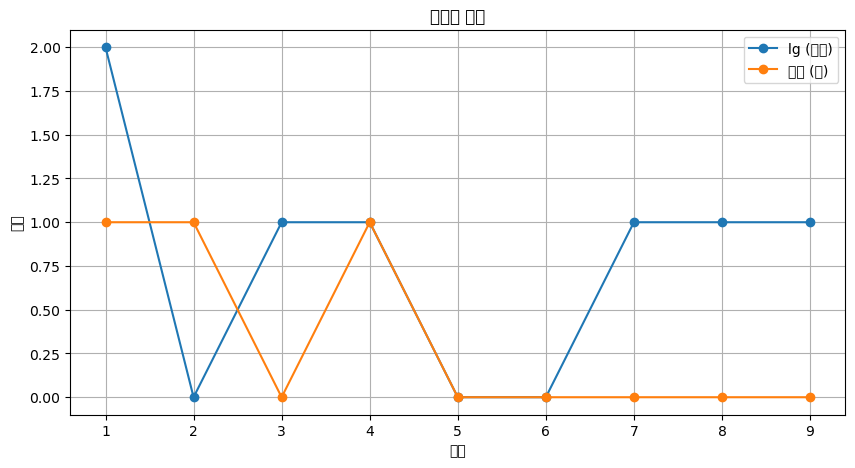

In [419]:
plt.figure(figsize=(10, 5))
plot_inning_scores("lg (ÏõêÏ†ï)", result['away_inning_scores'])
plot_inning_scores("ÌïúÌôî (Ìôà)", result['home_inning_scores'])
plt.show()

In [421]:
def print_player_stats(team_name, stats_dict):
    print(f"\nüìä {team_name} ÌÉÄÏûê ÏÑ±Ï†Å")
    print("-" * 30)
    for player, stats in stats_dict.items():
        ab = stats['ÌÉÄÏàò']
        hits = stats['ÏïàÌÉÄ']
        avg = hits / ab if ab > 0 else 0
        print(f"{player}: {ab}ÌÉÄÏàò {hits}ÏïàÌÉÄ ({avg:.3f})")

In [423]:
print_player_stats("lg", result['away_stats'])
print_player_stats("ÌïúÌôî", result['home_stats'])


üìä lg ÌÉÄÏûê ÏÑ±Ï†Å
------------------------------
Î∞ïÎèôÏõê: 5ÌÉÄÏàò 1ÏïàÌÉÄ (0.200)
Ïò§Ïä§Ìã¥: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)
Î¨∏Î≥¥Í≤Ω: 4ÌÉÄÏàò 3ÏïàÌÉÄ (0.750)
ÍπÄÌòÑÏàò: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÏÜ°Ï∞¨Ïùò: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÌôçÏ∞ΩÍ∏∞: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)
Ïò§ÏßÄÌôò: 4ÌÉÄÏàò 2ÏïàÌÉÄ (0.500)
Î∞ïÌï¥ÎØº: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
Íµ¨Î≥∏ÌòÅ: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)

üìä ÌïúÌôî ÌÉÄÏûê ÏÑ±Ï†Å
------------------------------
Ïù¥ÏßÑÏòÅ: 4ÌÉÄÏàò 1ÏïàÌÉÄ (0.250)
ÎÖ∏ÏãúÌôò: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
Î¨∏ÌòÑÎπà: 4ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÏµúÏû¨Ìõà: 4ÌÉÄÏàò 1ÏïàÌÉÄ (0.250)
Ï±ÑÏùÄÏÑ±: 3ÌÉÄÏàò 2ÏïàÌÉÄ (0.667)
ÌîåÎ°úÎ¶¨Ïñº: 3ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÏµúÏù∏Ìò∏: 3ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
Ìô©ÏòÅÎ¨µ: 3ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)
ÍπÄÌÉúÏó∞: 3ÌÉÄÏàò 0ÏïàÌÉÄ (0.000)


## Î™¨ÌÖåÏπ¥Î•ºÎ°ú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìï¥ÏÑú Í≤ΩÍ∏∞ÏàòÎ•º NÎ≤à Î∞òÎ≥µÌñàÏùÑ ÎïåÏùò ÌèâÍ∑† Ï†êÏàò Î∞è ÏäπÎ•†ÏùÑ ÏòàÏ∏°Ìï¥Î≥¥Í∏∞

In [425]:
def simulate_game_monte_carlo(n_simulations, away_lineup, away_probs, home_lineup, home_probs):
    results = []
    for _ in range(n_simulations):
        game_result = simulate_game(away_lineup, away_probs, home_lineup, home_probs)
        results.append(game_result)
    return results

In [427]:
def summarize_results(results):
    away_total = [r['away_total'] for r in results]
    home_total = [r['home_total'] for r in results]
    print(f"ÌèâÍ∑† Ï†êÏàò (AWAY): {sum(away_total)/len(away_total):.2f}")
    print(f"ÌèâÍ∑† Ï†êÏàò (HOME): {sum(home_total)/len(home_total):.2f}")
    print(f"ÏäπÎ•† (AWAY): {sum(1 for i in range(len(results)) if away_total[i] > home_total[i]) / len(results):.2%}")
    print(f"ÏäπÎ•† (HOME): {sum(1 for i in range(len(results)) if home_total[i] > away_total[i]) / len(results):.2%}")

In [429]:
lg_probs = compute_player_hit_probs(lg_merged)
hh_probs = compute_player_hit_probs(hh_merged)

## 200Î≤à Î∞òÎ≥µÌñàÏùÑ ÎïåÏùò Í≤∞Í≥ºÍ∞í

In [431]:
monte_results = simulate_game_monte_carlo(
    n_simulations=200,
    away_lineup=lg_lineup,
    away_probs=lg_probs,
    home_lineup=hh_lineup,
    home_probs=hh_probs
)

In [433]:
summarize_results(monte_results)

ÌèâÍ∑† Ï†êÏàò (AWAY): 5.70
ÌèâÍ∑† Ï†êÏàò (HOME): 5.71
ÏäπÎ•† (AWAY): 39.00%
ÏäπÎ•† (HOME): 46.00%
